In [2]:
# Heirarchial clustering
# Based on example at https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('HR Data 1.csv')
data.head()

,Active,Term,mgr domoe,mgr cox,mgr garza,mgr jenkins,mgr ortega,mgr quintana,mgr estrella,mgr lopez,...,shift c,shift d,shift days,shift nights,Base Rate,Base Salary,Average Daily Hours,Normal Weekly Hours,DaysEmployed,MilesDrive
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,26.00,54080.0,8,40,146,6.1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,14.64,30451.2,12,40,72,6.1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,14.64,30451.2,12,40,12,8.6
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,21.00,43680.0,8,40,129,2.1
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,18.00,37440.0,12,40,90,8.6


In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Active,Term,mgr domoe,mgr cox,mgr garza,mgr jenkins,mgr ortega,mgr quintana,mgr estrella,mgr lopez,...,shift c,shift d,shift days,shift nights,Base Rate,Base Salary,Average Daily Hours,Normal Weekly Hours,DaysEmployed,MilesDrive
0,0.000018,0.000000,0.000018,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000018,0.000000,0.000481,0.999986,0.000148,0.000740,0.002700,0.000113
1,0.000000,0.000033,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000033,0.000000,0.000481,0.999963,0.000394,0.001314,0.002364,0.000200
2,0.000000,0.000033,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000033,0.000000,0.000033,0.000481,0.999969,0.000394,0.001314,0.000394,0.000282
3,0.000023,0.000000,0.000000,0.000023,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000023,0.000000,0.000481,0.999981,0.000183,0.000916,0.002953,0.000048
4,0.000027,0.000000,0.000000,0.000000,0.000027,0.0,0.0,0.0,0.0,0.0,...,0.000027,0.000000,0.000000,0.000027,0.000481,0.999983,0.000321,0.001068,0.002404,0.000230


# Clustering Sparks 2021 Terms into Groups

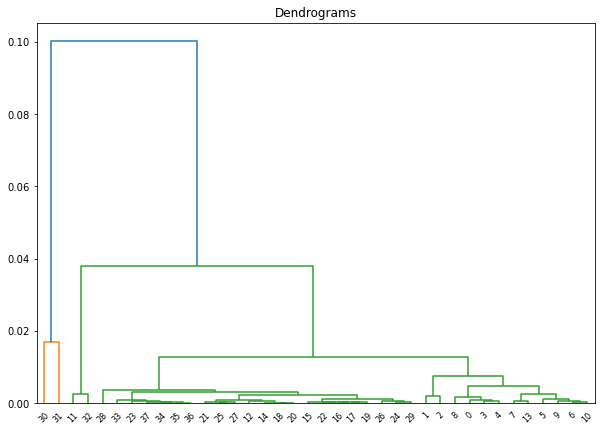

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

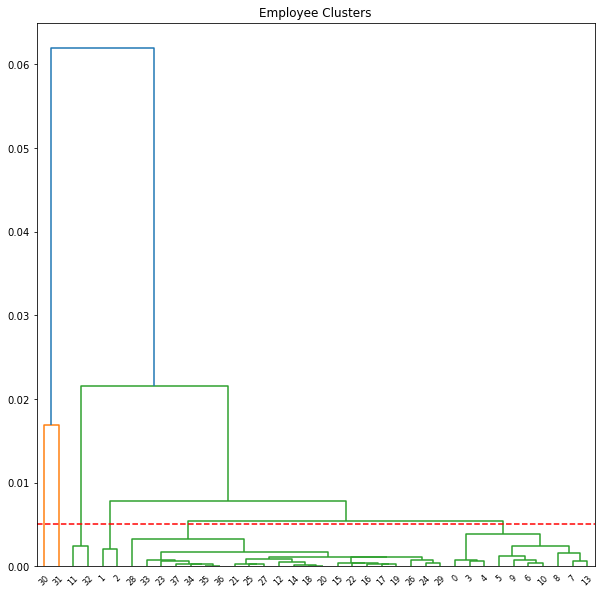

In [56]:
plt.figure(figsize=(10, 10))  
plt.title("Employee Clusters")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
plt.axhline(y=0.005, color='r', linestyle='--')

In [46]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

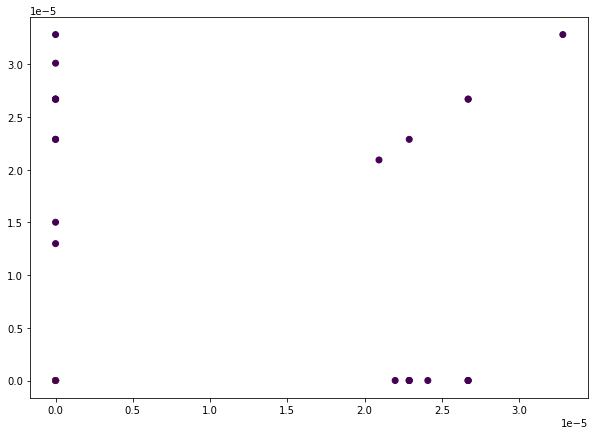

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['shift nights'], data_scaled['Term'], c=cluster.labels_) 